# C Bate - Reas. Comp. Assignment 3

## 1. Creating and manipulating arrays

In [113]:
import numpy as np
from matplotlib import pyplot as plt

### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan

In [ ]:
# Both should cover the range (-2, 2) and have 100 points in each direction

In [145]:
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

xx,yy = np.meshgrid(x,y)

### 1.2. Visualize each 2D array using pcolormesh

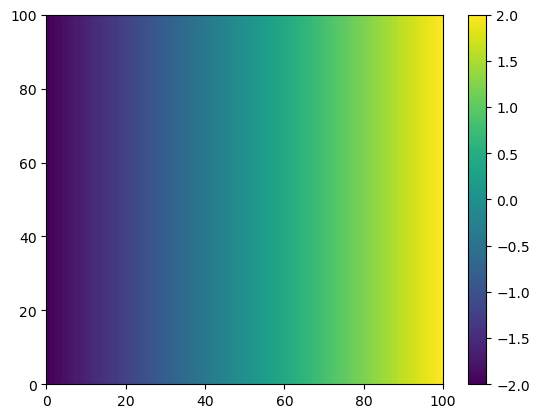

In [115]:
plt.pcolormesh(xx)
plt.colorbar()

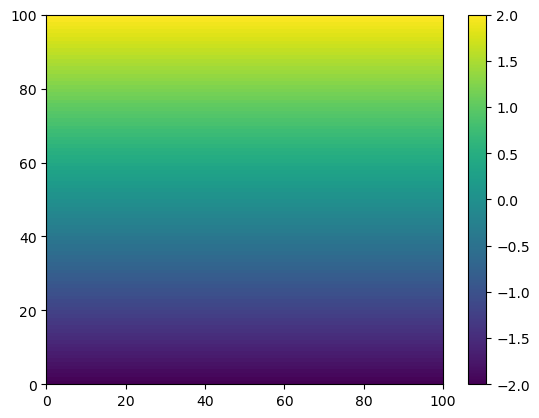

In [116]:
plt.pcolormesh(yy)
plt.colorbar()

## 1.3 From your cartesian coordinates, create polar coordinates r and phi

In [117]:
rr = np.sqrt(xx**2+yy**2)
phi = np.arctan2(yy,xx)

## 1.4. Visualize r and phi on the 2D x/y plane using pcolormesh

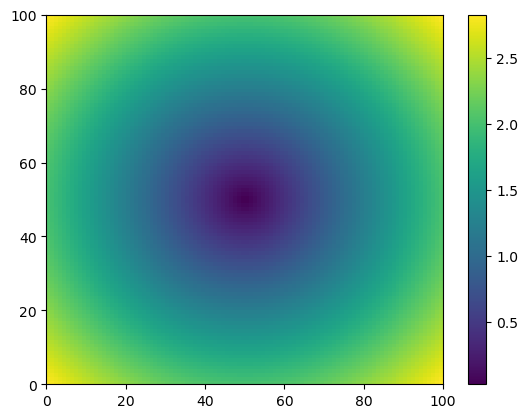

In [118]:
plt.pcolormesh(rr)
plt.colorbar()

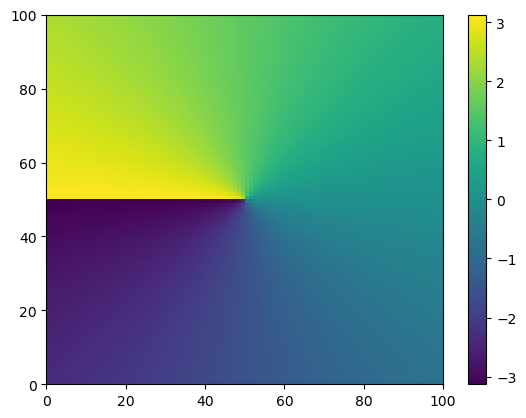

In [119]:
plt.pcolormesh(phi)
plt.colorbar()

## 1.5 Calculate the quantity f and plot it on the x/y plane

In [120]:
f = np.cos(4*rr)**2 + np.sin(4*phi)**2

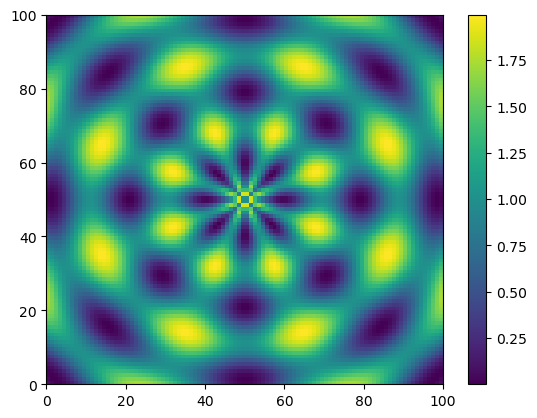

In [121]:
plt.pcolormesh(f)
plt.colorbar()

## 1.6 Plot the mean of f with respect to the x axis as a function of y

Text(0, 0.5, 'Mean value of column of f')

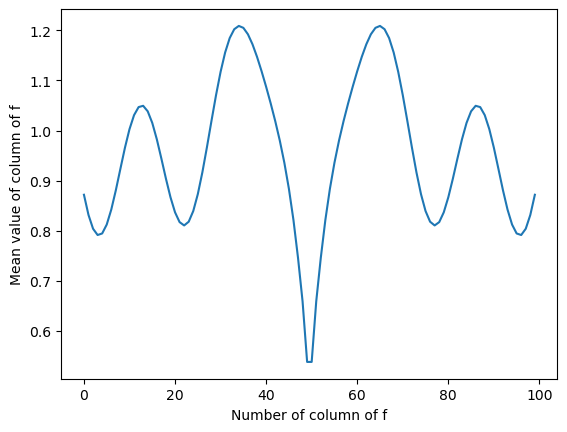

In [122]:
f_ymean = np.mean(f,axis=0) # take mean of each column (of y values at each x value)
plt.plot(f_ymean)
plt.xlabel('Number of column of f')
plt.ylabel('Mean value of column of f')

## 1.7 Plot the mean of f with respect to the y axis as a function of x

Text(0, 0.5, 'Mean value of row of f')

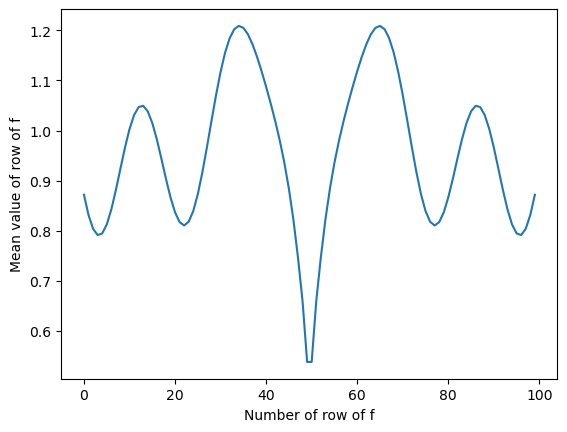

In [123]:
f_xmean = np.mean(f,axis=1) # take mean of each row (of x values at each y value)
plt.plot(f_xmean)
plt.xlabel('Number of row of f')
plt.ylabel('Mean value of row of f')

## 1.8 Plot the mean of f with respect to phi as a function of r

In [ ]:
# This is hard. You will need to define a discrete range of r values and then figure out how to 
# average f within the bins defined by your r grid. There are many different ways to accomplish this.

Text(0.5, 1.0, 'f($\\phi$,r)')

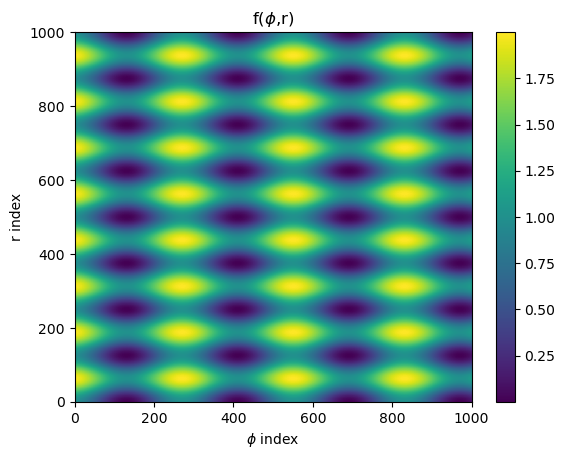

In [146]:
# I interpret this question to mean that I should take the mean f along r for each phi.

# plot f(phi,r)
phiLine = np.linspace(-1*np.pi,np.pi,1000)
rLine = np.linspace(np.min(rr),np.max(rr),1000)
f_phiSlice = np.zeros((len(rLine),1))
f_rmean = np.zeros((len(phiLine),1))
fff = np.zeros((len(rLine),len(phiLine)))

rrr, ppp = np.meshgrid(rLine,phiLine)

for i in range(0,len(phiLine)):
    for j in range(0,len(rLine)):
        fff[i,j] = np.cos(4*rLine[j])**2 + np.sin(4*phiLine[i])**2

plt.pcolormesh(fff)
plt.colorbar()
plt.xlabel('$\phi$ index')
plt.ylabel('r index')
plt.title('f($\phi$,r)')

Text(0.5, 1.0, 'Mean f with respect to r along $\\phi$')

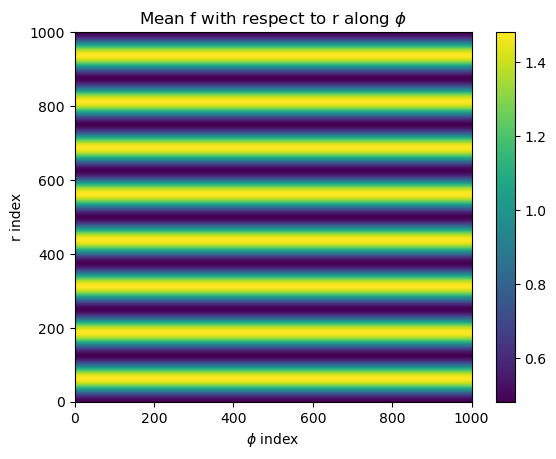

In [144]:
# plot mean(f) wrt r along phi

for i in range(0,len(phiLine)):
    for j in range(0,len(rLine)):
        f_phiSlice[j] = np.cos(4*rLine[j])**2 + np.sin(4*phiLine[i])**2
    f_rmean[i] = np.mean(f_phiSlice)


grid = np.ones((len(phiLine),len(rLine)))
f_grid = f_rmean*grid # automatic broadcasting!


plt.pcolormesh(f_grid)
plt.colorbar()
plt.xlabel('$\phi$ index')
plt.ylabel('r index')
plt.title('Mean f with respect to r along $\phi$')



# Part 2: Analyze ARGO Data

## 2.1 Load each data file as a numpy array.

In [147]:
# Copied .npy files to folder without using pooch

T = np.load('T.npy')
S = np.load('S.npy')
P = np.load('P.npy')
date = np.load('date.npy')
lat = np.load('lat.npy')
lon = np.load('lon.npy')
level = np.load('levels.npy')

## 2.2 Examine the shapes of T, S and P compared to lon, lat, date and level. How do you think they are related?

In [128]:
print('T:',T.shape)
print('S:',S.shape)
print('P:',P.shape)
print('date:',date.shape)
print('lat:',lat.shape)
print('lon:',lon.shape)
print('level:',level.shape)

T: (78, 75)
S: (78, 75)
P: (78, 75)
date: (75,)
lat: (75,)
lon: (75,)
level: (78,)


In [143]:
# ANSWER:
# Each column of T, S, and P corresponds to a single profile, each with a single date and 
# spatial coordinate (latitude & longitude). 
# There are 75 profiles (columns), each containing 78 data points (rows) corresponding to 78 levels.

## 2.3 Make a plot for each column of data in T, S and P (three plots).

In [130]:
# The vertical scale should be the levels data. Each plot should have a line for each column of data. 
# It will look messy.

Text(0.5, 1.0, 'ARGO float temperature profiles')

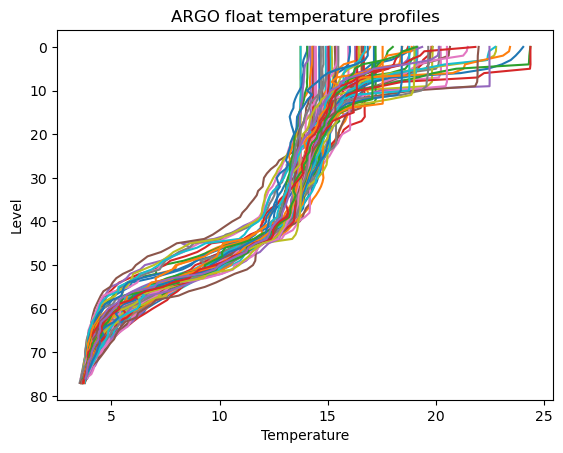

In [131]:
d = len(T[1, :]) # number of columns (profiles with date and coords)
n = len(T[:, 1]) # number of rows (data points per profile) 


for i in range(0, d):
   plt.plot(T[:,i],level)

plt.gca().invert_yaxis()
plt.xlabel('Temperature')
plt.ylabel('Level')
plt.title('ARGO float temperature profiles')

Text(0.5, 1.0, 'ARGO float salinity profiles')

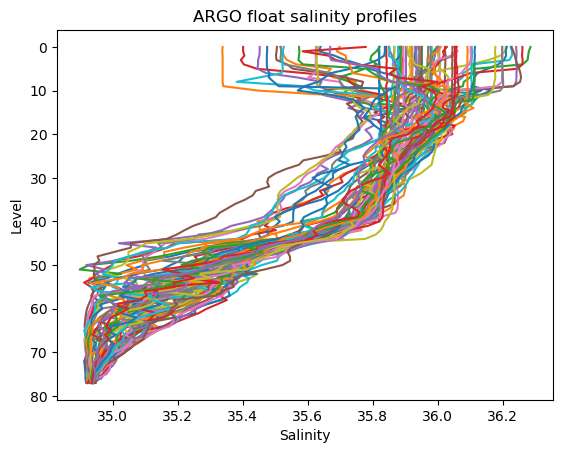

In [132]:
for i in range(0, d):
   plt.plot(S[:,i],level)

plt.gca().invert_yaxis()
plt.xlabel('Salinity')
plt.ylabel('Level')
plt.title('ARGO float salinity profiles')

Text(0.5, 1.0, 'ARGO float pressure profiles')

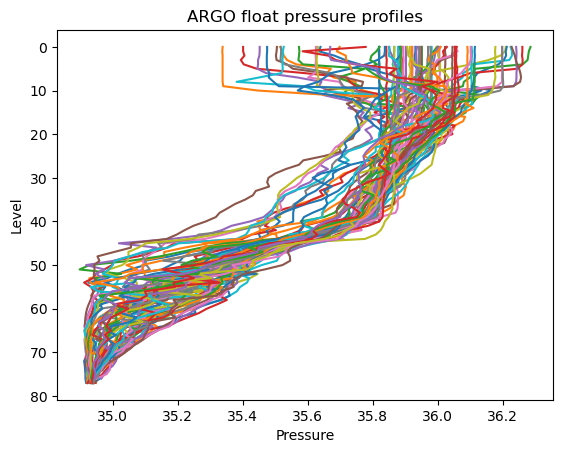

In [133]:
for i in range(0, d):
   plt.plot(S[:,i],level)

plt.gca().invert_yaxis()
plt.xlabel('Pressure')
plt.ylabel('Level')
plt.title('ARGO float pressure profiles')

## 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in level

In [134]:
Tmean = np.zeros((n,1))
Tstd = np.zeros((n,1))

for i in range(0,n):
    Tmean[i] = np.mean(T[i,:])
    Tstd[i] = np.std(T[i,:])

Smean = np.zeros((n,1))
Sstd = np.zeros((n,1))

for i in range(0,n):
    Smean[i] = np.mean(S[i,:])
    Sstd[i] = np.std(S[i,:])

Pmean = np.zeros((n,1))
Pstd = np.zeros((n,1))

for i in range(0,n):
    Pmean[i] = np.mean(P[i,:])
    Pstd[i] = np.std(P[i,:])

## 2.5 Now make three similar plots, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations.

Text(0.5, 1.0, 'ARGO float mean temperature profiles')

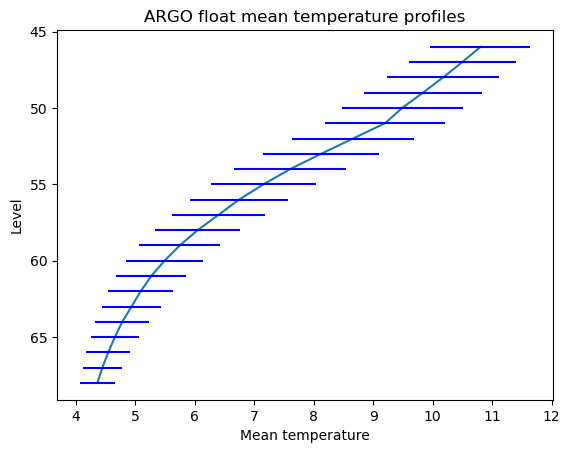

In [135]:
plt.plot(Tmean,level)

plt.gca().invert_yaxis()
for i in range(0,n):
    plt.errorbar(Tmean[i],level[i],yerr = None, xerr = Tstd[i],ecolor='b')
plt.xlabel('Mean temperature')
plt.ylabel('Level')
plt.title('ARGO float mean temperature profiles')

Text(0.5, 1.0, 'ARGO float mean salinity profiles')

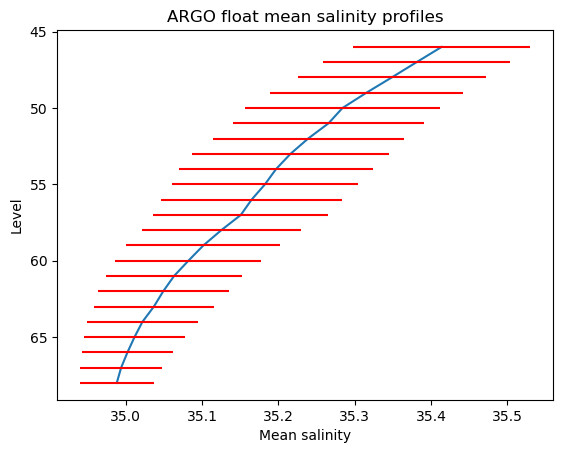

In [136]:
plt.plot(Smean,level)

plt.gca().invert_yaxis()
for i in range(0,n):
    plt.errorbar(Smean[i],level[i],yerr = None, xerr = Sstd[i],ecolor='r')
plt.xlabel('Mean salinity')
plt.ylabel('Level')
plt.title('ARGO float mean salinity profiles')

Text(0.5, 1.0, 'ARGO float mean pressure profiles')

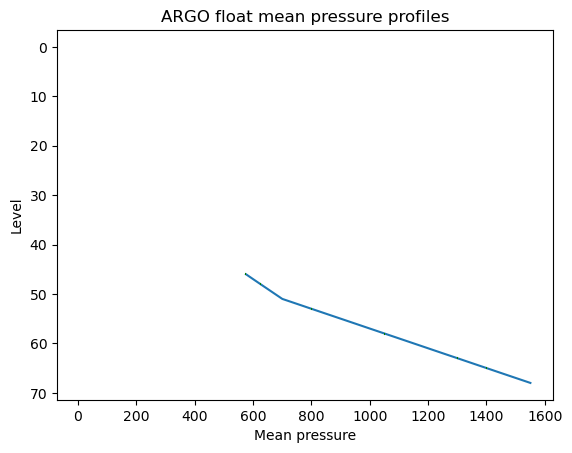

In [137]:
plt.plot(Pmean,level)

plt.gca().invert_yaxis()
for i in range(0,n):
    plt.errorbar(Pmean[i],level[i],yerr = None, xerr = Pstd[i],ecolor='g')
plt.xlabel('Mean pressure')
plt.ylabel('Level')
plt.title('ARGO float mean pressure profiles')

## 2.6 Account For Missing Data

In [138]:
Tmean = np.zeros((n,1))
Tstd = np.zeros((n,1))

for i in range(0,n):
    Tmean[i] = np.nanmean(T[i,:])
    Tstd[i] = np.nanstd(T[i,:])

Smean = np.zeros((n,1))
Sstd = np.zeros((n,1))

for i in range(0,n):
    Smean[i] = np.nanmean(S[i,:])
    Sstd[i] = np.nanstd(S[i,:])

Pmean = np.zeros((n,1))
Pstd = np.zeros((n,1))

for i in range(0,n):
    Pmean[i] = np.nanmean(P[i,:])
    Pstd[i] = np.nanstd(P[i,:])

Text(0.5, 1.0, 'ARGO float mean temperature profiles')

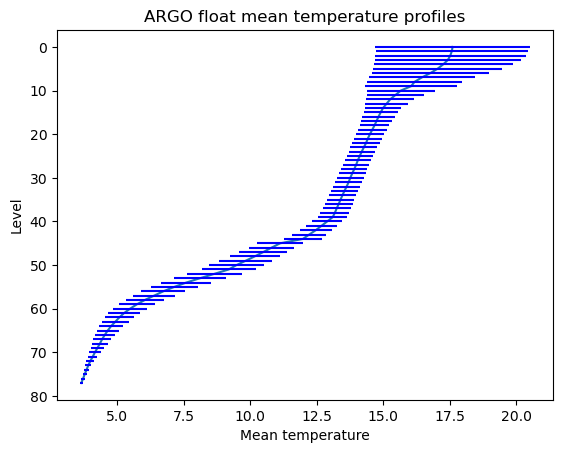

In [139]:
plt.plot(Tmean,level)

plt.gca().invert_yaxis()
for i in range(0,n):
    plt.errorbar(Tmean[i],level[i],yerr = None, xerr = Tstd[i],ecolor='b')
plt.xlabel('Mean temperature')
plt.ylabel('Level')
plt.title('ARGO float mean temperature profiles')

Text(0.5, 1.0, 'ARGO float mean salinity profiles')

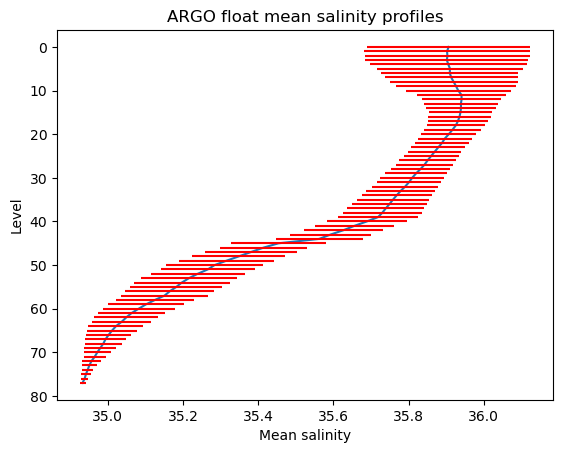

In [140]:
plt.plot(Smean,level)

plt.gca().invert_yaxis()
for i in range(0,n):
    plt.errorbar(Smean[i],level[i],yerr = None, xerr = Sstd[i],ecolor='r')
plt.xlabel('Mean salinity')
plt.ylabel('Level')
plt.title('ARGO float mean salinity profiles')

Text(0.5, 1.0, 'ARGO float mean pressure profiles')

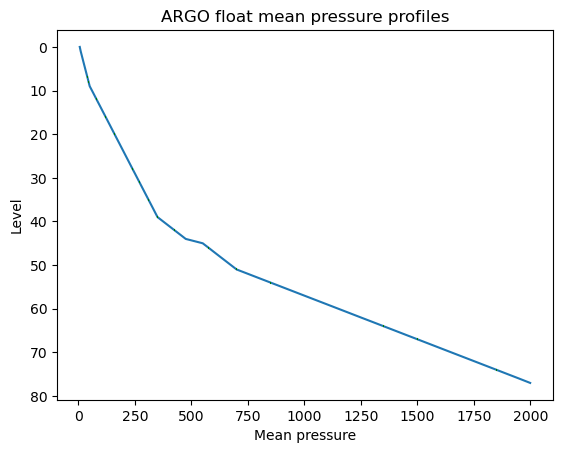

In [141]:
plt.plot(Pmean,level)

plt.gca().invert_yaxis()
for i in range(0,n):
    plt.errorbar(Pmean[i],level[i],yerr = None, xerr = Pstd[i],ecolor='g')
plt.xlabel('Mean pressure')
plt.ylabel('Level')
plt.title('ARGO float mean pressure profiles')

## 2.7 Create a scatter plot of the lon, lat positions of the ARGO float.

In [ ]:
# Use the plt.scatter function.

Text(0, 0.5, 'Latitude (deg)')

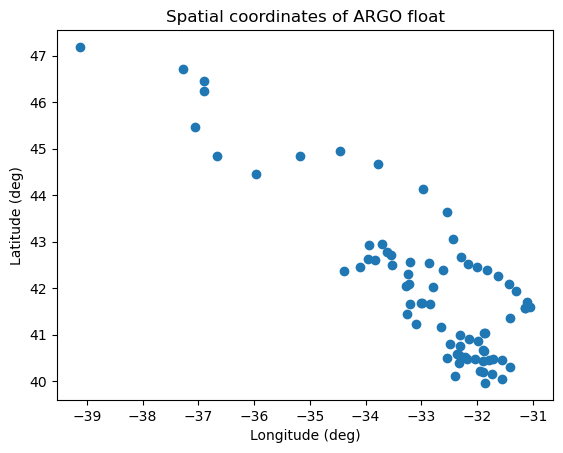

In [148]:
plt.scatter(lon,lat)
plt.title('Spatial coordinates of ARGO float')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')